<a href="https://colab.research.google.com/github/camiscf/tcc/blob/main/Rascunhao_tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.offline as py
import plotly.graph_objs as go

In [105]:
# Determinando a url
companies_500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Lê a url e raspa os dados das empresas
data_table = pd.read_html(companies_500_url)
tickers = data_table[0]['Symbol'].values.tolist()

In [106]:
start_date = "2023-01-01"
end_date = "2023-12-31"

## 1. The use case

What are the daily returns and volatility for these companies’ stocks over that period?
This will give us an indication of their level of risk. The higher the volatility, the riskier it is.

In [107]:
df_grande = pd.DataFrame()

In [108]:
for ticker in tickers:
  stock_data = yf.download(ticker, start=start_date, end=end_date)
  stock_data['Ticker'] = ticker
    # Concatena os dados ao DataFrame grande
  stock_data['Daily_Returns'] = (stock_data['Close'].pct_change()) * 100
  df_grande = pd.concat([df_grande, stock_data])

# Reorganiza as colunas
df_grande = df_grande[['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Returns']]
df_grande.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Ticker,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,,
2023-01-03,MMM,121.519997,122.639999,120.370003,122.470001,115.488167,2612800.0,NaN
2023-01-04,MMM,123.349998,125.290001,122.709999,125.150002,118.015373,2769700.0,2.188291
2023-01-05,MMM,124.209999,124.570000,122.459999,122.959999,115.950226,2606600.0,-1.749902
2023-01-06,MMM,124.660004,127.129997,123.750000,126.720001,119.495880,2417000.0,3.057907
2023-01-09,MMM,127.000000,129.460007,126.110001,126.790001,119.561882,2871300.0,0.055240


In [109]:
df_grande.dropna(inplace=True)
df_grande

,Ticker,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
Date,,,,,,,,
2023-01-04,MMM,123.349998,125.290001,122.709999,125.150002,118.015373,2769700.0,2.188291
2023-01-05,MMM,124.209999,124.570000,122.459999,122.959999,115.950226,2606600.0,-1.749902
2023-01-06,MMM,124.660004,127.129997,123.750000,126.720001,119.495880,2417000.0,3.057907
2023-01-09,MMM,127.000000,129.460007,126.110001,126.790001,119.561882,2871300.0,0.055240
2023-01-10,MMM,127.070000,128.190002,126.699997,128.130005,120.825493,1648100.0,1.056869
...,...,...,...,...,...,...,...,...
2023-12-22,ZTS,195.320007,195.910004,192.740005,194.979996,194.538773,1548400.0,0.164385
2023-12-26,ZTS,194.880005,196.339996,194.089996,195.500000,195.057587,814600.0,0.266696
2023-12-27,ZTS,195.410004,197.009995,194.740005,196.899994,196.454422,766400.0,0.716109


In [110]:
df_grande.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
count,124476.000000,124476.000000,124476.000000,124476.000000,124476.000000,1.244760e+05,124476.000000
mean,179.515605,181.469901,177.679542,179.634575,178.268889,4.824721e+06,0.061420
std,345.530558,349.289010,342.297081,345.875377,345.677542,1.083862e+07,1.818920
min,8.070000,8.560000,7.980000,8.450000,8.337273,0.000000e+00,-38.486345
25%,59.060001,59.707500,58.419998,59.020000,58.116679,9.721750e+05,-0.860424
50%,106.900002,108.094997,105.744999,106.970001,105.689999,1.974900e+06,0.066683
75%,202.751774,205.070007,200.695004,202.922497,201.519512,4.383550e+06,0.961463
max,7028.500000,7075.000000,6997.910156,7024.819824,7024.819824,3.723413e+08,27.377626


In [111]:
df_grande.reset_index(inplace=True)

df_reorganizado = df_grande.pivot_table(index='Ticker', columns='Date', values=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Returns'])

In [112]:
df_reorganizado.head()

Adj Close                                                  \
Date    2023-01-04  2023-01-05  2023-01-06  2023-01-09  2023-01-10   
Ticker                                                               
A       150.575943  151.012756  146.604797  146.406219  154.110245   
AAL      13.590000   13.990000   14.180000   14.610000   15.190000   
AAPL    125.497498  124.166641  128.735229  129.261627  129.837662   
ABBV    155.845032  155.654602  158.567947  153.912323  151.989120   
ABNB     88.720001   87.709999   88.519997   89.239998   88.540001   

                                                                    ...  \
Date    2023-01-11  2023-01-12  2023-01-13  2023-01-17  2023-01-18  ...   
Ticker                                                              ...   
A       157.029037  155.361191  155.788055  154.279037  152.958618  ...   
AAL      15.340000   16.830000   17.020000   17.080000   16.639999  ...   
AAPL    132.578827  132.499374  133.840164  135.012100  134.287094  ...   
ABBV    149.637497  146.302399  147.628754  146.888687  143.399796  ...   
ABNB     94.440002   98.489998  100.370003  101.269997  101.110001  ...   

             Volume                                                  \
Date     2023-12-15  2023-12-18  2023-12-19  2023-12-20  2023-12-21   
Ticker                                                                
A         4876000.0   1634700.0   1523300.0   2120900.0   1685700.0   
AAL      34725700.0  28471700.0  22574300.0  26557500.0  30372600.0   
AAPL    128256700.0  55751900.0  40714100.0  52242800.0  46482500.0   
ABBV     15203000.0   5379600.0   5476700.0   4716400.0   4036100.0   
ABNB      7771000.0   4175200.0   5090400.0   5718000.0   3318500.0   

                                                                    
Date    2023-12-22  2023-12-26  2023-12-27  2023-12-28  2023-12-29  
Ticker                                                              
A        1204100.0    948400.0   1182300.0    892600.0   1014400.0  
AAL     25169900.0  22157900.0  23428500.0  17093400.0  24242000.0  
AAPL    37122800.0  28919300.0  48087700.0  34049900.0  42628800.0  
ABBV     3372800.0   2073400.0   3747400.0   2601200.0   3711400.0  
ABNB     2936100.0   4384800.0   3989600.0   2770800.0   3074100.0  

[5 rows x 1743 columns]

In [113]:
df_daily_returns_ticker = df_reorganizado.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
df_daily_returns_ticker

Daily_Returns                                                         \
Date      2023-01-04 2023-01-05 2023-01-06 2023-01-09 2023-01-10 2023-01-11   
Ticker                                                                        
A           1.086380   0.290105  -2.918942  -0.135435   5.262083   1.893965   
AAL         6.671903   2.943338   1.358117   3.032435   3.969883   0.987496   
AAPL        1.031423  -1.060465   3.679410   0.408887   0.445641   2.111229   
ABBV        0.806748  -0.122180   1.871673  -2.936055  -1.249539  -1.547232   
ABNB        4.499411  -1.138415   0.923495   0.813377  -0.784398   6.663656   
...              ...        ...        ...        ...        ...        ...   
YUM         1.354752  -0.761576   2.028188  -0.406784  -0.277436   0.224118   
ZBH         0.927096  -1.852721  -0.301400   0.278446  -0.436337  -0.940239   
ZBRA        1.072244  -1.114108   5.137282   2.146878   2.735502   4.481935   
ZION        3.652498  -1.751943   3.870314  -0.468197   0.039201   0.568184   
ZTS         1.436841  -2.356344   1.505674  -0.392849   4.963962   2.293336   

                                                    ...                        \
Date   2023-01-12 2023-01-13 2023-01-17 2023-01-18  ... 2023-12-15 2023-12-18   
Ticker                                              ...                         
A       -1.062144   0.274773  -0.968649  -0.855847  ...  -0.855326   0.548326   
AAL      9.713167   1.128940   0.352523  -2.576116  ...  -0.685404  -1.725328   
AAPL    -0.059931   1.011911   0.875637  -0.536998  ...  -0.272572  -0.850336   
ABBV    -3.149454   0.906586  -0.501305  -2.375191  ...  -0.542363  -0.402490   
ABNB     4.288432   1.908828   0.896676  -0.157990  ...  -0.448179   0.613911   
...           ...        ...        ...        ...  ...        ...        ...   
YUM     -0.616858   1.031889   0.084473  -1.235326  ...  -1.883915   1.422576   
ZBH     -0.900903   0.146104  -0.299883  -0.756036  ...   0.134990   0.092679   
ZBRA    -2.264922   0.238912  -0.040867   1.008251  ...  -0.727517  -1.295433   
ZION     0.233779  -0.116621  -1.031327  -5.112077  ...  -4.007003  -1.824816   
ZTS      1.272964   0.631602  -0.838920   0.250670  ...  -1.899147   0.219068   

                                                                          \
Date   2023-12-19 2023-12-20 2023-12-21 2023-12-22 2023-12-26 2023-12-27   
Ticker                                                                     
A        1.643274  -1.151728   0.550014   0.453437   0.171950   0.007160   
AAL      0.421351  -2.237767   2.646644  -0.278745  -1.397629  -0.850460   
AAPL     0.536017  -1.071393  -0.076995  -0.554750  -0.284092   0.051795   
ABBV     0.117330  -1.243492   0.593311   1.540079  -0.206536   0.168161   
ABNB    -0.399998  -3.975220   0.723037  -0.907871  -1.477274  -1.564301   
...           ...        ...        ...        ...        ...        ...   
YUM     -0.176282  -0.921385   0.728458   0.015390   0.199996   0.445265   
ZBH      0.984847   0.025005  -0.291665   0.760548   0.713338  -0.238841   
ZBRA     1.027456  -2.898830   1.414324   1.545364   2.260494   0.105266   
ZION     2.067842  -3.164123   2.538782   0.871162   2.000002  -0.824427   
ZTS      0.691338  -1.741719   0.015413   0.164385   0.266696   0.716109   

                              
Date   2023-12-28 2023-12-29  
Ticker                        
A       -0.035762  -0.529445  
AAL     -0.071481  -1.716737  
AAPL     0.222629  -0.542413  
ABBV    -0.083939   0.142166  
ABNB     0.329547  -0.627738  
...           ...        ...  
YUM     -0.244567   0.107263  
ZBH      0.412780   0.057551  
ZBRA    -0.159543  -0.733619  
ZION     0.337006  -1.768923  
ZTS      0.132052   0.106508  

[501 rows x 249 columns]

In [114]:
df_daily_returns_ticker.describe()

Daily_Returns                                                  \
Date     2023-01-04  2023-01-05  2023-01-06  2023-01-09  2023-01-10   
count    499.000000  499.000000  499.000000  499.000000  499.000000   
mean       1.550279   -1.053261    2.400063    0.037904    0.744206   
std        1.954487    1.909568    1.611534    1.802086    1.470287   
min       -5.847330   -9.724870   -7.837168   -9.293569   -6.203271   
25%        0.497261   -2.171577    1.600411   -0.985969   -0.043239   
50%        1.368768   -1.097353    2.540315    0.055240    0.589625   
75%        2.514626   -0.096328    3.280326    1.058773    1.333233   
max       10.511695    9.773657    7.795955    5.934901    8.182608   

                                                                   ...  \
Date   2023-01-11  2023-01-12  2023-01-13  2023-01-17  2023-01-18  ...   
count  499.000000  499.000000  499.000000  499.000000  499.000000  ...   
mean     1.245876    0.366414    0.255253   -0.215010   -1.525404  ...   
std      1.660192    1.573853    1.107849    1.370429    1.285199  ...   
min     -7.595963   -5.948814   -5.440800   -6.821896   -6.307588  ...   
25%      0.235460   -0.520024   -0.351536   -0.964381   -2.268462  ...   
50%      1.011632    0.210576    0.327329   -0.324320   -1.550835  ...   
75%      2.084779    1.099030    0.905117    0.465691   -0.738814  ...   
max      8.316663    9.713167    3.798710    7.426474    4.952074  ...   

                                                                               \
Date   2023-12-15  2023-12-18  2023-12-19  2023-12-20  2023-12-21  2023-12-22   
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000   
mean    -0.683337    0.094945    0.843742   -1.696608    1.221551    0.338525   
std      1.296093    1.219031    1.163725    1.171271    1.270464    1.233329   
min     -6.358838   -7.785029   -2.144045  -12.053571   -7.007664  -11.825674   
25%     -1.474888   -0.566785    0.133966   -2.126657    0.535166   -0.005514   
50%     -0.641849    0.184245    0.691338   -1.580029    1.042753    0.384084   
75%      0.006838    0.774494    1.413010   -1.015972    1.704440    0.729447   
max      6.584517    4.685174    9.102643    1.285072    8.628797   18.082863   

                                                       
Date   2023-12-26  2023-12-27  2023-12-28  2023-12-29  
count  501.000000  501.000000  501.000000  501.000000  
mean     0.597145    0.118756    0.121818   -0.368615  
std      0.766205    0.608617    0.684299    0.688084  
min     -2.863964   -2.014563   -3.159428   -3.312586  
25%      0.206547   -0.239064   -0.174844   -0.767446  
50%      0.564241    0.108216    0.142634   -0.275858  
75%      0.943399    0.464104    0.503377    0.067947  
max      5.208333    3.493272    2.569110    2.718555  

[8 rows x 249 columns]

In [115]:
df_daily_returns_ticker.index

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', name='Ticker', length=501)

In [116]:
mean_by_ticker = df_daily_returns_ticker.mean(axis=1)

In [117]:
trace = go.Bar(
    x=df_daily_returns_ticker.index,  # Índices das empresas no eixo x
    y=mean_by_ticker,      # Médias dos retornos diários no eixo y
    marker=dict(color='skyblue'), # Cor das barras
)

data = [trace]

layout = go.Layout(
    title='Média dos Retornos Diários por Empresa',
    xaxis=dict(title='Empresa'),           # Título do eixo x
    yaxis=dict(title='Média do Retorno Diário'), # Título do eixo y
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [119]:
df_grande['Daily_Volatility'] = df_grande.groupby('Ticker')['Daily_Returns'].transform('std')
df_grande

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Daily_Returns,Daily_Volatility
0,2023-01-04,MMM,123.349998,125.290001,122.709999,125.150002,118.015373,2769700.0,2.188291,1.725544
1,2023-01-05,MMM,124.209999,124.570000,122.459999,122.959999,115.950226,2606600.0,-1.749902,1.725544
2,2023-01-06,MMM,124.660004,127.129997,123.750000,126.720001,119.495880,2417000.0,3.057907,1.725544
3,2023-01-09,MMM,127.000000,129.460007,126.110001,126.790001,119.561882,2871300.0,0.055240,1.725544
4,2023-01-10,MMM,127.070000,128.190002,126.699997,128.130005,120.825493,1648100.0,1.056869,1.725544
...,...,...,...,...,...,...,...,...,...,...
124471,2023-12-22,ZTS,195.320007,195.910004,192.740005,194.979996,194.538773,1548400.0,0.164385,1.575825
124472,2023-12-26,ZTS,194.880005,196.339996,194.089996,195.500000,195.057587,814600.0,0.266696,1.575825
124473,2023-12-27,ZTS,195.410004,197.009995,194.740005,196.899994,196.454422,766400.0,0.716109,1.575825
124474,2023-12-28,ZTS,197.619995,198.600006,196.529999,197.160004,196.713837,880100.0,0.132052,1.575825


In [123]:
volatilidade_diaria_por_ticker = df_daily_returns_ticker.std(axis=1)

volatilidade_diaria_por_ticker

Ticker
A       1.690221
AAL     2.222093
AAPL    1.256559
ABBV    1.244034
ABNB    2.677456
          ...   
YUM     1.020098
ZBH     1.293286
ZBRA    2.594817
ZION    4.042059
ZTS     1.575825
Length: 501, dtype: float64

In [124]:
# Preprocessamento
from sklearn.preprocessing import StandardScaler

# Redução de dimensionalidade
from sklearn.decomposition import PCA

In [144]:
scaler = StandardScaler()
df_daily_returns_ticker = df_daily_returns_ticker.dropna()
df_scaled = scaler.fit_transform(df_daily_returns_ticker)

# Em seguida, aplicamos o PCA
pca = PCA()
pca.fit(df_scaled)

# Visualize a variância explicada por cada componente principal
print("Variância explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Variância explicada por cada componente principal:
[0.09168468 0.06788275 0.04397936 0.02796416 0.02418631 0.02247451
 0.01877012 0.01751472 0.01553636 0.01526834 0.01350886 0.01304964
 0.01231533 0.01217045 0.01145268 0.01109773 0.01066415 0.010358
 0.01011413 0.00972512 0.00925713 0.00914661 0.0087939  0.00867202
 0.00816634 0.00811595 0.0078198  0.00772781 0.00755375 0.00743791
 0.00721842 0.00713402 0.00699144 0.00690989 0.00678701 0.00663987
 0.00652864 0.00635852 0.00627482 0.00613694 0.00605409 0.00593607
 0.00578204 0.00568919 0.0056541  0.00558583 0.0054929  0.00538372
 0.00531001 0.00519824 0.00509458 0.00501227 0.0049397  0.00487633
 0.00474912 0.00465921 0.00463791 0.00454697 0.00446734 0.00438763
 0.00433089 0.00429719 0.0042613  0.0041984  0.00410356 0.00406871
 0.00401334 0.00393163 0.00390421 0.00384738 0.00377214 0.00373225
 0.00367023 0.00363113 0.00358345 0.00352307 0.00345411 0.00344533
 0.00339475 0.00334343 0.0032991  0.00326804 0.00325607 0.00314876
 0.00314086 0

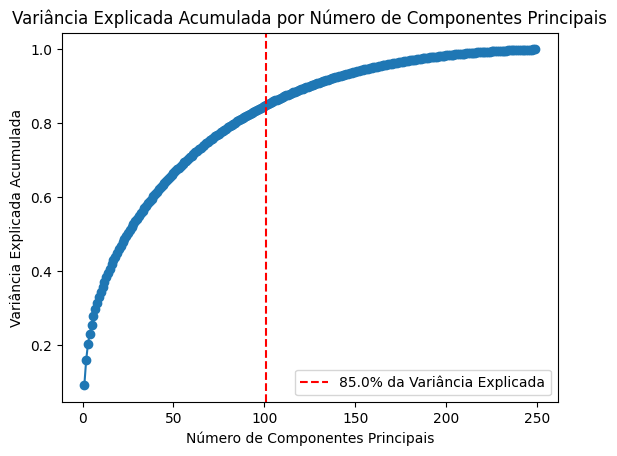

O número de componentes necessários para explicar pelo menos 85.0% da variância é: 101


In [148]:
# Determine o número de componentes para 85% de variância explicada
# Variância explicada acumulada
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.85
num_components_85 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1

# Plote a curva de cotovelo
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada por Número de Componentes Principais')
plt.axvline(x=num_components_85, color='r', linestyle='--', label=f'{threshold*100}% da Variância Explicada')
plt.legend()
plt.show()

print(f'O número de componentes necessários para explicar pelo menos {threshold*100}% da variância é: {num_components_85}')

In [149]:
N_COMPONENTS = 101

In [150]:
pca_cols = ["PC%d" %i for i in range(1, N_COMPONENTS+1)]
df_pca = pd.DataFrame(df_scaled[:,:N_COMPONENTS], columns=pca_cols)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101
0,-0.237589,0.704198,-3.303897,-0.096285,3.075870,0.390762,-0.908592,0.017637,-0.550481,0.521498,...,0.081606,-0.090059,0.171290,0.052622,-0.037887,0.441991,-3.645685,-0.461768,-0.021976,-1.500099
1,2.623074,2.095034,-0.647204,1.663371,2.196112,-0.155789,5.944730,0.789424,0.414544,-0.818369,...,0.642306,1.980753,0.091109,-0.947499,-2.322311,-0.684264,-0.610170,1.660235,-0.560692,1.577541
2,-0.265736,-0.003776,0.794666,0.206069,-0.203270,0.521760,-0.271164,0.683683,0.796642,0.769840,...,1.051311,-0.529087,0.348393,0.258776,-0.560878,-0.285238,0.959024,0.282520,0.323094,0.967624
3,-0.380805,0.488077,-0.328209,-1.651943,-1.357385,-1.684089,-2.236165,0.588515,-0.209118,-0.661875,...,-0.592219,-0.701344,-0.436036,1.093806,-0.267399,-0.364389,0.111579,-0.677235,-0.864216,-0.438423
4,1.510418,-0.044638,-0.917169,0.430751,-1.040707,3.266621,2.494486,1.494097,0.812010,1.065039,...,0.795947,0.774505,1.492211,-2.831761,1.565765,-1.427012,0.453004,-0.454184,0.802544,0.436522


In [151]:
from sklearn.manifold import TSNE

# Supondo que seu DataFrame esteja normalizado e preenchido (df_scaled)

# Instanciar o modelo t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Aplicar o t-SNE
df_tsne = tsne.fit_transform(df_scaled)

# Criar DataFrame para os resultados do t-SNE
df_tsne = pd.DataFrame(data=df_tsne, columns=['TSNE1', 'TSNE2'])


In [152]:
df_tsne

,TSNE1,TSNE2
0,-21.789743,-10.422638
1,-24.311174,1.726771
2,-1.432597,-11.962066
3,14.552885,-5.234526
4,-19.400724,-3.840213
...,...,...
494,8.793440,-6.262003
495,9.336157,-13.970673
496,-5.505878,12.717009
497,-23.001270,13.382418


In [159]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=98bce73819dfaddabb0a9163cd646548d6e1d9393ac8bb9d000c931b53bebe07
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [160]:
import umap.umap_ as umap


In [161]:
# Supondo que seu DataFrame esteja normalizado e preenchido (df_scaled)

# Instanciar o modelo UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)

# Aplicar o UMAP
df_umap = umap_model.fit_transform(df_scaled)

# Criar DataFrame para os resultados do UMAP
df_umap = pd.DataFrame(data=df_umap, columns=['UMAP1', 'UMAP2'])


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [162]:
df_umap

,UMAP1,UMAP2
0,14.705861,7.227626
1,11.817968,10.242165
2,13.422194,8.104663
3,12.655760,5.595189
4,12.312964,9.683588
...,...,...
494,12.814367,6.076097
495,13.466169,6.001915
496,12.682623,9.328504
497,8.531317,7.686649


como eu defino o numero de componentes ideias para esses dois modelos
No caso do t-SNE e do UMAP, não há um parâmetro direto que corresponda ao número de componentes principais como no PCA. Em vez disso, eles operam de forma diferente e são mais orientados à visualização do que à redução de dimensionalidade.

Para o t-SNE, o principal parâmetro a ser ajustado é a perplexidade, que controla o número de vizinhos considerados ao otimizar a estrutura de vizinhança dos pontos no espaço de destino. O valor típico de perplexidade varia de 5 a 50. Um valor mais alto de perplexidade considera um número maior de vizinhos, o que pode levar a agrupamentos mais apertados, mas também pode aumentar a computação necessária. A perplexidade precisa ser ajustada de acordo com as características específicas do seu conjunto de dados.

In [163]:
# Instanciar o modelo t-SNE com perplexidade definida
"# tsne = TSNE(n_components=2, perplexity=30, random_state=42)


Para o UMAP, o principal parâmetro a ser ajustado é a n_neighbors, que controla a quantidade de vizinhos usados para a construção da estrutura de vizinhança. Valores mais altos resultam em uma representação mais global dos dados, enquanto valores menores podem levar a representações mais localizadas. Novamente, esse parâmetro precisa ser ajustado de acordo com as características específicas do seu conjunto de dados.



In [165]:
# umap_model = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)


In [167]:
from keras.layers import Input, Dense
from keras.models import Model

# Definir a arquitetura do autoencoder
input_dim = df_daily_returns_ticker.shape[1]  # Número de características
encoding_dim = 2  # Número de dimensões no espaço latente
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Criar o modelo do autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Treinar o modelo
autoencoder.fit(df_scaled, df_scaled, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/50
2/2 [==============================] - 2s 323ms/step - loss: 0.6936 - val_loss: 0.6909
Epoch 2/50
2/2 [==============================] - 0s 73ms/step - loss: 0.6910 - val_loss: 0.6887
Epoch 3/50
2/2 [==============================] - 0s 63ms/step - loss: 0.6886 - val_loss: 0.6865
Epoch 4/50
2/2 [==============================] - 0s 48ms/step - loss: 0.6861 - val_loss: 0.6842
Epoch 5/50
2/2 [==============================] - 0s 80ms/step - loss: 0.6836 - val_loss: 0.6818
Epoch 6/50
2/2 [==============================] - 0s 51ms/step - loss: 0.6809 - val_loss: 0.6794
Epoch 7/50
2/2 [==============================] - 0s 52ms/step - loss: 0.6782 - val_loss: 0.6768
Epoch 8/50
2/2 [==============================] - 0s 63ms/step - loss: 0.6754 - val_loss: 0.6740
Epoch 9/50
2/2 [==============================] - 0s 82ms/step - loss: 0.6725 - val_loss: 0.6711
Epoch 10/50
2/2 [==============================] - 0s 81ms/step - loss: 0.6694 - val_loss: 0.6680
Epoch 11/50
2/2 [===========

In [170]:
from sklearn.manifold import Isomap

# Instanciar o modelo Isomap
isomap = Isomap(n_components=2)

# Aplicar o Isomap aos dados
df_isomap = isomap.fit_transform(df_scaled)

# Criar DataFrame para os resultados do Isomap
df_isomap = pd.DataFrame(data=df_isomap, columns=['Isomap1', 'Isomap2'])
df_isomap

,Isomap1,Isomap2
0,-19.474134,-11.758148
1,-16.980854,-8.327858
2,-3.561579,-5.971946
3,18.616200,-0.681478
4,-22.283144,-12.789756
...,...,...
494,14.158750,4.878693
495,-0.992042,0.087882
496,-18.336017,-6.405564
497,-11.130922,55.571270


Não usei a NMF pq temos valores negativos e eles são importantes

In [173]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



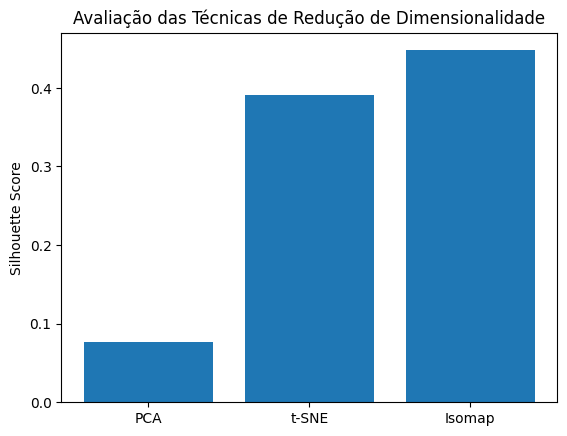

A melhor técnica de redução de dimensionalidade é: Isomap


In [182]:
# Aplicar as técnicas de redução de dimensionalidade
pca = PCA(n_components=101)
tsne = TSNE(n_components=2)
isomap = Isomap(n_components=2)

# Lista das técnicas
tecnicas = {'PCA': pca, 't-SNE': tsne, 'Isomap': isomap}

# Avaliar cada técnica usando K-Means e pontuação de silhueta
scores = {}
for nome_tecnica, tecnica in tecnicas.items():
    # Aplicar a técnica de redução de dimensionalidade
    df_reduced = tecnica.fit_transform(df_scaled)

    # Aplicar K-Means aos dados reduzidos
    kmeans = KMeans(n_clusters=3)  # número arbitrário de clusters
    labels = kmeans.fit_predict(df_reduced)

    # Calcular a pontuação de silhueta
    silhouette_avg = silhouette_score(df_reduced, labels)
    scores[nome_tecnica] = silhouette_avg

# Visualizar as pontuações de silhueta
plt.bar(scores.keys(), scores.values())
plt.ylabel('Silhouette Score')
plt.title('Avaliação das Técnicas de Redução de Dimensionalidade')
plt.show()

# Escolher a melhor técnica com base na pontuação de silhueta
melhor_tecnica = max(scores, key=scores.get)
print(f'A melhor técnica de redução de dimensionalidade é: {melhor_tecnica}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



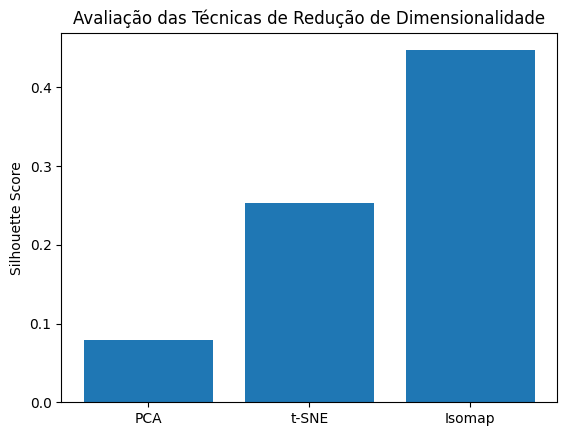

A melhor técnica de redução de dimensionalidade é: Isomap


In [183]:
# Aplicar as técnicas de redução de dimensionalidade
pca = PCA(n_components=101)
tsne = TSNE(n_components=3)
isomap = Isomap(n_components=2)

# Lista das técnicas
tecnicas = {'PCA': pca, 't-SNE': tsne, 'Isomap': isomap}

# Avaliar cada técnica usando K-Means e pontuação de silhueta
scores = {}
for nome_tecnica, tecnica in tecnicas.items():
    # Aplicar a técnica de redução de dimensionalidade
    df_reduced = tecnica.fit_transform(df_scaled)

    # Aplicar K-Means aos dados reduzidos
    kmeans = KMeans(n_clusters=3)  # número arbitrário de clusters
    labels = kmeans.fit_predict(df_reduced)

    # Calcular a pontuação de silhueta
    silhouette_avg = silhouette_score(df_reduced, labels)
    scores[nome_tecnica] = silhouette_avg

# Visualizar as pontuações de silhueta
plt.bar(scores.keys(), scores.values())
plt.ylabel('Silhouette Score')
plt.title('Avaliação das Técnicas de Redução de Dimensionalidade')
plt.show()

# Escolher a melhor técnica com base na pontuação de silhueta
melhor_tecnica = max(scores, key=scores.get)
print(f'A melhor técnica de redução de dimensionalidade é: {melhor_tecnica}')